# Support Vector Machines - 1

In [13]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

### EDA

In [14]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [17]:
# Dropping columns which are not required

data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [18]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

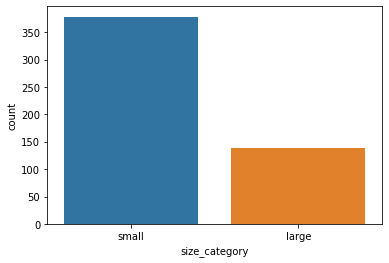

In [19]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

In [20]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


In [21]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


In [22]:
# Encoding categorical data of month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [23]:
# Encoding target variable 'size category'

data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


In [29]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data,data['size_category'], test_size=0.3, random_state=42)

In [30]:
x_train

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
311,9,7,92.4,105.8,758.1,9.9,24.8,28,1.8,0.0,14.29,1
368,9,6,91.2,94.3,744.4,8.4,16.8,47,4.9,0.0,12.64,1
23,8,6,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00,0
271,8,2,92.1,152.6,658.2,14.3,20.1,58,4.5,0.0,9.27,1
299,6,6,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,9,5,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.00,0
106,3,4,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0,0.00,0
270,8,2,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52,0
435,7,6,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00,0


In [31]:
x_test

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
304,5,6,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00,0
501,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0
441,8,1,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23,0
153,9,5,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46,0
503,8,3,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,8,2,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,8.71,1
66,9,5,92.4,117.9,668.0,12.2,23.0,37,4.5,0.0,0.00,0
286,7,3,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00,0
422,7,7,88.9,263.1,795.9,5.2,29.3,27,3.6,0.0,6.30,1


In [32]:
y_train

311    1
368    1
23     0
271    1
299    0
      ..
71     0
106    0
270    0
435    0
102    0
Name: size_category, Length: 361, dtype: int64

In [33]:
y_test

304    0
501    0
441    0
153    0
503    0
      ..
192    1
66     0
286    0
422    1
94     0
Name: size_category, Length: 156, dtype: int64

### Building model with Grid Search CV

In [35]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [36]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7340840840840841)

In [38]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.71794871794873


array([[115,   0],
       [ 41,   0]], dtype=int64)